In [1]:
!pip3 install pyyaml==5.1

     |████████████████████████████████| 276kB 16.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=f5397fc8e1dc3c2d39398e6c7548e4c2d02dea2e4277c9be03d53e2308add463
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!nvidia-smi

Sun Feb 21 10:32:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 684kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 2.2MB 18.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210220-cp36-none-any.whl size=52292 sha256=47bb603c5bb2784704479388af2e5b27c08b30e5a6f4a87cfcc48b2f6cfb113e
  Stored in directory: /root/.cache/pip/wheels/a1/af/2b/42e10bc07a70a2776e1a011d058a952db114a60f7bc8aa2199
  Created wheel for iopath: filename=iopath-0.1.4-cp36-none-any.whl size=15571 sha256=66ea714fbf1d09f904d002f08b86ca5809a5c50f59b5887103fb7e5f313f61d6
  Stored in directory: /root/.cache/pip/wheels/54/3b/fb/25b60ef5989e3f5fd76fdc575c922e6e59066ddbd1b44756a9
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling 

In [1]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import glob

import os
import ntpath
import numpy as np
import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9 # Set threshold for this model
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/Omdena-BLi/TrainingResult/model_final.pth' # Set path model .pth
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
predictor = DefaultPredictor(cfg)

In [6]:
img = cv2.imread("/content/drive/MyDrive/MeetingPeople.jpg", cv2.IMREAD_COLOR)

In [7]:
outputs = predictor(img)

/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [8]:
outputs

{'instances': Instances(num_instances=3, image_height=450, image_width=830, fields=[pred_boxes: Boxes(tensor([[451.9018, 124.2188, 517.0998, 195.5622],
         [163.6999,  31.2513, 273.8531, 148.5983],
         [515.6077,  51.2383, 585.7315, 126.1689]], device='cuda:0')), scores: tensor([0.9414, 0.9208, 0.9191], device='cuda:0'), pred_classes: tensor([0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  

In [9]:
outputs['instances'].pred_boxes.tensor.cpu().numpy()

array([[451.90182 , 124.21881 , 517.0998  , 195.56221 ],
       [163.69992 ,  31.251299, 273.85306 , 148.5983  ],
       [515.6077  ,  51.238316, 585.7315  , 126.16889 ]], dtype=float32)

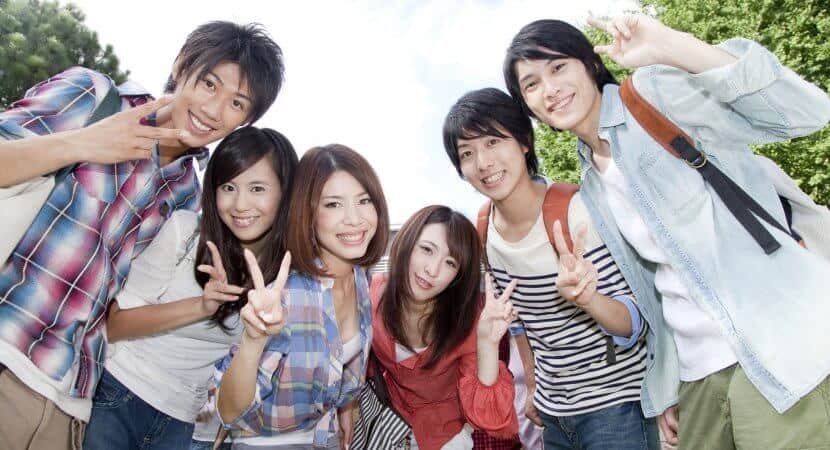

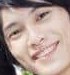

In [23]:
from google.colab.patches import cv2_imshow
import math
box = outputs['instances'].pred_boxes.tensor.cpu().numpy()[2]
x2 = math.ceil(box[0])
x1 = math.ceil(box[1])
y2 = math.ceil(box[2])
y1 = math.ceil(box[3])
crop_img = img[x1:y1,x2:y2]
#crop_img = cv2.resize(crop_img, (500,250))

# showing original image
cv2_imshow(img)

# showing cropped number plate
cv2_imshow(crop_img)

In [16]:
!pip install deepface

In [17]:
from deepface import DeepFace
# import cv2
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

In [24]:
result = DeepFace.analyze(crop_img, actions = ['emotion'])

In [25]:
print(result)

{'emotion': {'angry': 0.045492895878851414, 'disgust': 1.079983648296712e-18, 'fear': 14.529313147068024, 'happy': 85.42255759239197, 'sad': 0.0026382638679933734, 'surprise': 2.2738564727455965e-15, 'neutral': 4.997991256971979e-09}, 'dominant_emotion': 'happy'}
